In [1]:
import pandas as pd
import seaborn as sns
import warnings
sns.set_palette('Pastel1')
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# 1. Preliminary Data Exploration

In [2]:
dat = pd.read_csv('/Users/victoriashi/Downloads/us-covid-imputed-data.csv', parse_dates=True)
dat['date'] = pd.to_datetime(dat['date'], format='%m/%d/%y')

In [3]:
dat.head()

,date,county_fips,county_name,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade,...,age_45_49,age_50_54,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio
0,2020-01-22,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
1,2020-01-23,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
2,2020-01-24,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
3,2020-01-25,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
4,2020-01-26,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048


In [4]:
dat.columns

Index(['date', 'county_fips', 'county_name', 'state_fips', 'state_name',
       'covid_19_confirmed_cases', 'covid_19_deaths',
       'social_distancing_total_grade', 'social_distancing_encounters_grade',
       'social_distancing_travel_distance_grade', 'daily_state_test',
       'precipitation', 'temperature', 'virus_pressure', 'total_population',
       'female_percent', 'area', 'population_density', 'latitude', 'longitude',
       'hospital_beds_ratio', 'ventilator_capacity_ratio', 'icu_beds_ratio',
       'houses_density', 'less_than_high_school_diploma',
       'high_school_diploma_only', 'some_college_or_higher',
       'total_college_population', 'percent_smokers', 'percent_diabetes',
       'Religious_congregation_ratio', 'political_party', 'airport_distance',
       'passenger_load_ratio', 'meat_plants', 'median_household_income',
       'percent_insured', 'deaths_per_100000', 'gdp_per_capita', 'age_0_4',
       'age_5_9', 'age_10_14', 'age_15_19', 'age_20_24', 'age_25_29',
 

In [5]:
dat.describe()

,date,county_fips,state_fips,covid_19_confirmed_cases,covid_19_deaths,daily_state_test,precipitation,temperature,virus_pressure,total_population,...,age_45_49,age_50_54,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio
count,562128,562128.000000,562128.000000,562128.000000,562128.000000,562128.000000,562128.000000,562128.000000,562128.000000,5.621280e+05,...,562128.000000,562128.000000,562128.000000,562128.000000,562128.000000,562128.000000,562128.000000,562128.000000,562128.000000,562128.000000
mean,2020-05-20 00:00:00.000000256,30308.641156,30.215561,10.435710,0.297320,9905.415670,29.244772,15.489529,9.931611,1.247548e+05,...,7.339711,7.571854,6.988520,6.156037,4.846939,3.728741,2.923044,2.232993,2.140306,0.015786
min,2020-01-22 00:00:00,1003.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-42.200000,0.000000,1.227000e+03,...,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2020-03-21 00:00:00,19040.500000,19.000000,0.000000,0.000000,32.000000,0.000000,8.000000,0.000000,1.311925e+04,...,7.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,2.000000,2.000000,0.000000
50%,2020-05-20 00:00:00,29162.000000,29.000000,0.000000,0.000000,3556.000000,0.000000,17.500000,1.000000,3.239800e+04,...,7.000000,8.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,2.000000,0.000202
75%,2020-07-19 00:00:00,45045.500000,45.000000,3.000000,0.000000,11616.000000,18.200000,23.900000,6.142857,8.701025e+04,...,8.000000,8.000000,8.000000,7.000000,5.000000,4.000000,3.000000,3.000000,3.000000,0.020194
max,2020-09-16 00:00:00,56039.000000,56.000000,9589.000000,674.000000,187926.000000,3048.000000,65.600000,3178.666667,1.010552e+07,...,11.000000,12.000000,12.000000,12.000000,11.000000,10.000000,7.000000,6.000000,8.000000,0.540009
std,NaN,15075.833771,15.062041,68.690669,3.048049,17436.955701,81.886443,9.935048,42.100318,3.756101e+05,...,0.811161,0.894014,1.067193,1.201922,1.238022,1.045508,0.870207,0.763852,0.902967,0.032668


In [6]:
#extract month and year from date
dat['month'] = dat['date'].dt.month
dat['year'] = dat['date'].dt.year

In [7]:
# aggregate by the column state_name and produce a new dataframe
dat_state = dat.groupby('state_name')
dat.drop('county_name', axis=1, inplace=True)

In [8]:
dat.head()

,date,county_fips,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade,daily_state_test,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio,month,year
0,2020-01-22,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020
1,2020-01-23,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020
2,2020-01-24,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020
3,2020-01-25,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020
4,2020-01-26,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020


## 2. Data Preprocessing

Separate data into the specified regions

In [9]:
# Define the states in each region
regions = {
    'Northwest': ['Washington', 'Oregon', 'Idaho', 'Montana', 'Wyoming'],
    'Southwest': ['Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
                'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky',
              'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'South Carolina',
              'Tennessee', 'Virginia', 'West Virginia'],
    'Great Lakes': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'],
    'New England': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont']
}

# Create separate dataframes for each region and set 'date' as the index
Northwest = dat[dat['state_name'].isin(regions['Northwest'])].set_index('date')
Southwest = dat[dat['state_name'].isin(regions['Southwest'])].set_index('date')
Midwest = dat[dat['state_name'].isin(regions['Midwest'])].set_index('date')
South = dat[dat['state_name'].isin(regions['South'])].set_index('date')
Great_Lakes = dat[dat['state_name'].isin(regions['Great Lakes'])].set_index('date')
New_England = dat[dat['state_name'].isin(regions['New England'])].set_index('date')

In [10]:
Midwest.head()

,county_fips,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade,daily_state_test,precipitation,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio,month,year
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,17001,17,Illinois,0.0,0.0,F,F,F,0.0,25.4,...,7,6,5,4,3,3,3,0.026503,1,2020
2020-01-23,17001,17,Illinois,0.0,0.0,F,F,F,0.0,45.2,...,7,6,5,4,3,3,3,0.026503,1,2020
2020-01-24,17001,17,Illinois,0.0,0.0,F,F,F,0.0,86.0,...,7,6,5,4,3,3,3,0.026503,1,2020
2020-01-25,17001,17,Illinois,0.0,0.0,F,F,F,0.0,30.0,...,7,6,5,4,3,3,3,0.026503,1,2020
2020-01-26,17001,17,Illinois,0.0,0.0,F,F,F,0.0,34.0,...,7,6,5,4,3,3,3,0.026503,1,2020


### Aggregate data by month

In [11]:
# Function to aggregate monthly confirmed cases for a given dataframe
def aggregate_monthly(df):
    monthly_df = df.groupby([df.year, df.month]).agg({'covid_19_confirmed_cases':'sum'}).reset_index()
    monthly_df.columns = ['Year', 'Month', 'Monthly_Confirmed_Cases']
    monthly_df['Date'] = pd.to_datetime(monthly_df[['Year', 'Month']].assign(DAY=1))
    monthly_df = monthly_df.set_index('Date')
    return monthly_df

# Apply the aggregation to each region
Northwest_monthly = aggregate_monthly(Northwest)
Southwest_monthly = aggregate_monthly(Southwest)
Midwest_monthly = aggregate_monthly(Midwest) 
South_monthly = aggregate_monthly(South)
Great_Lakes_monthly = aggregate_monthly(Great_Lakes)
New_England_monthly = aggregate_monthly(New_England)

### store each state's data as csv file

In [12]:
import os
#check if dir exists
if not os.path.exists('/Users/victoriashi/DataspellProjects/LTV_DataSci_Capstone_Project/VS_processed_region_data'):
    os.mkdir('/Users/victoriashi/DataspellProjects/LTV_DataSci_Capstone_Project/VS_processed_region_data')
    print(f"Created Directory VS_processed_region_data")
    Northwest_monthly.to_csv('/Users/victoriashi/DataspellProjects/LTV_DataSci_Capstone_Project/VS_processed_region_data/Northwest_monthly.csv')
    Southwest_monthly.to_csv('/Users/victoriashi/DataspellProjects/LTV_DataSci_Capstone_Project/VS_processed_region_data/Southwest_monthly.csv')
    Midwest_monthly.to_csv('/Users/victoriashi/DataspellProjects/LTV_DataSci_Capstone_Project/VS_processed_region_data/Midwest_monthly.csv')
    South_monthly.to_csv('/Users/victoriashi/DataspellProjects/LTV_DataSci_Capstone_Project/VS_processed_region_data/South_monthly.csv')
    Great_Lakes_monthly.to_csv('/Users/victoriashi/DataspellProjects/LTV_DataSci_Capstone_Project/VS_processed_region_data/Great_Lakes_monthly.csv')
    New_England_monthly.to_csv('/Users/victoriashi/DataspellProjects/LTV_DataSci_Capstone_Project/VS_processed_region_data/New_England_monthly.csv')
    print(f"Generated regional data in csv format")
else:
    print(f"Directory VS_processed_region_data already exists")

Created Directory VS_processed_region_data
Generated regional data in csv format


# EDA

In [13]:
# Dictionary of all aggregated monthly dataframes
regions_monthly = {
    'Northwest': Northwest_monthly,
    'Southwest': Southwest_monthly,
    'Midwest': Midwest_monthly,
    'South': South_monthly,
    'Great Lakes': Great_Lakes_monthly,
    'New England': New_England_monthly
}

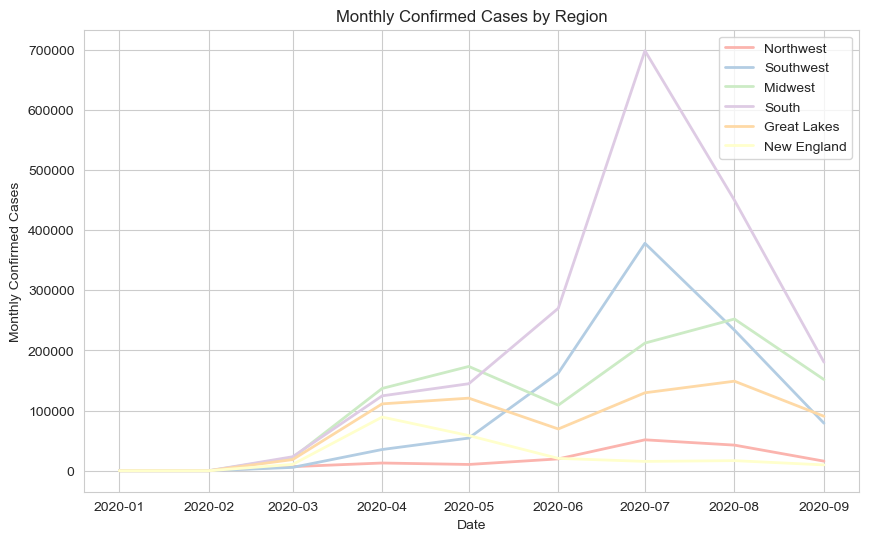

In [14]:
plt.figure(figsize=(10, 6))

for region_name, region_data in regions_monthly.items():
    sns.lineplot(data=region_data, x=region_data.index, y='Monthly_Confirmed_Cases', label=region_name, lw=2)

plt.title('Monthly Confirmed Cases by Region')
plt.xlabel('Date')
plt.ylabel('Monthly Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()

# ARIMA

In [15]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

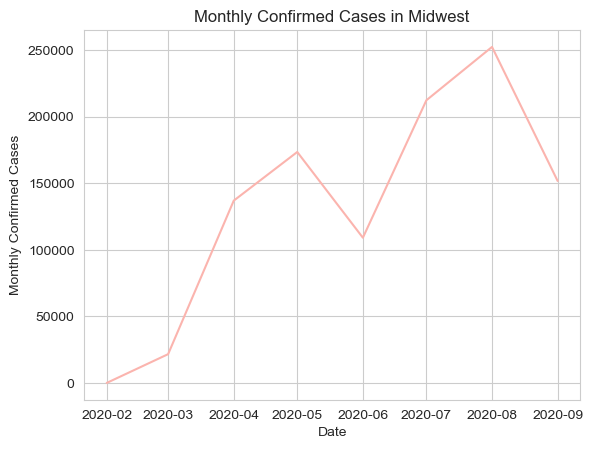

In [18]:
# Visualize the time series data
plt.plot(Midwest_monthly['Monthly_Confirmed_Cases'])
plt.title('Monthly Confirmed Cases in Midwest')
plt.ylabel('Monthly Confirmed Cases')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [19]:
# 2. Check for Stationarity using ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'{key}: {value}')

adf_test(Midwest_monthly['Monthly_Confirmed_Cases'])

ADF Statistic: -5.022321348658499
p-value: 2.0043009678172747e-05
1%: -6.045114
5%: -3.9292800000000003
10%: -2.98681


In [21]:
# 3. Stationarize the Series
Midwest_monthly['Differenced_Data'] = Midwest_monthly['Monthly_Confirmed_Cases'].diff()
Midwest_monthly.dropna(inplace=True)

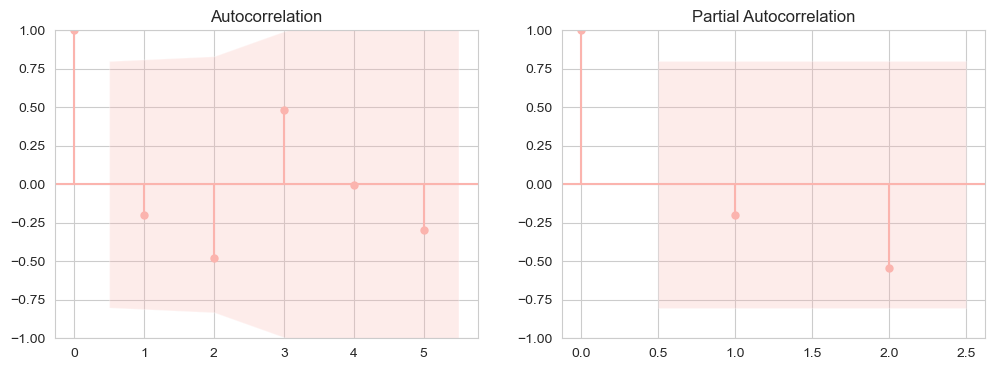

In [24]:
# 4. Determine ARIMA parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(Midwest_monthly['Differenced_Data'], ax=ax[0])
plot_pacf(Midwest_monthly['Differenced_Data'], ax=ax[1], lags=2)
plt.show()

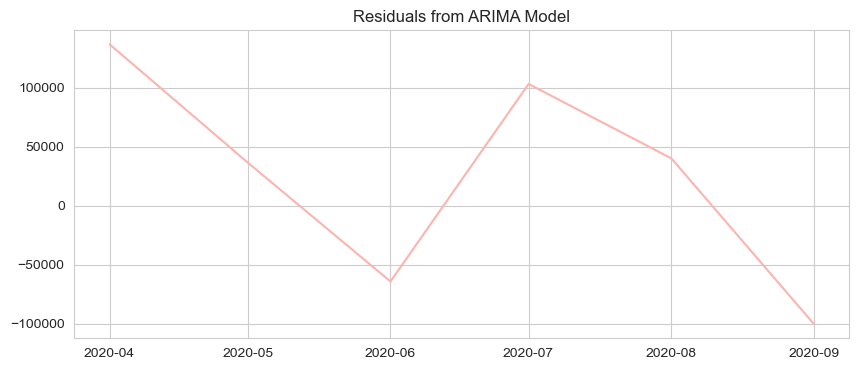

In [29]:
# 5. Fit ARIMA model
Midwest_monthly = Midwest_monthly.asfreq('MS')
# Given the small dataset, start with a simpler model
model = ARIMA(Midwest_monthly['Monthly_Confirmed_Cases'], order=(0,1,0))
model_fit = model.fit()

# Check the residuals
residuals = model_fit.resid
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.show()

# Plot the ACF of residuals
# from statsmodels.graphics.tsaplots import plot_acf
# plot_acf(residuals)
# plt.show()